In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
from sam_inference import *
import json 
import io
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import seaborn as sbn
sbn.set_theme()

In [3]:
SAMSERVEIP

'138.2.230.91'

In [4]:
PREDICTIONS_API

'https://138.2.230.91:8443/predictions'

# Load a cat picture

In [3]:
cat = Image.open('images/kitten_small.jpg')

# Send prediction requests to torchserver

## Automatic mask generation

Note: the `model_scale` argument controls the size of the Segment anything
model. The below uses "h" (Huge), the flagship version, but "l" (Large) and "b"
(Base, the smallest) are also available.

In [13]:
res = auto_maskgen(cat, model_scale='h')

/home/charlie/miniconda3/envs/hf/lib/python3.9/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '138.2.230.91'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


## Inspect and plot output

In [25]:
res = res.json()

AttributeError: 'list' object has no attribute 'json'

res is now a list of segmentation predictions

In [26]:
len(res)

37

In [ ]:
r = res[0]

each item in the list is a dictionary with these keys

In [ ]:
list(r.keys())

['segmentation',
 'area',
 'bbox',
 'predicted_iou',
 'point_coords',
 'stability_score',
 'crop_box']

inspecting the 0th segmentation mask

In [ ]:
seg = r['segmentation'] 

In [ ]:
seg = np.array(seg)

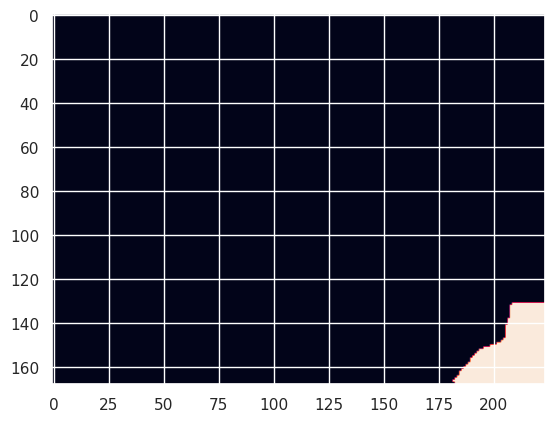

In [ ]:
plt.imshow(seg)

## Plotting segmentation masks on an image

In [21]:
c = np.asarray(cat)

In [22]:
c.shape

(168, 224, 3)

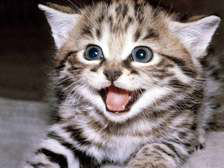

In [23]:
cat

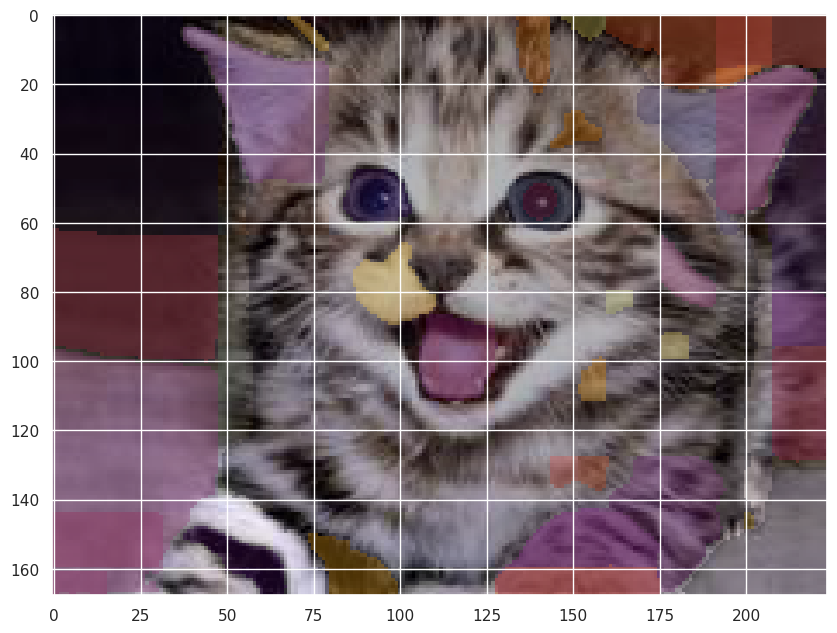

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
cm = plt.get_cmap('inferno')
nrm = Normalize(0, len(res))
sm = ScalarMappable(norm=nrm, cmap=cm)
ax.imshow(c)
for i,r in enumerate(res):
    seg = r['segmentation']
    seg = np.asarray(seg)
    seg = np.stack([seg*x for x in sm.to_rgba(i)], axis=-1)
    ax.imshow(seg, alpha=0.3)

## Prompted segmentation

Sorry, still not quite working!

In [11]:
res = predict(cat, "cat", model_scale='b')

https://138.2.230.91:8443/predictions/sam_b_predict


/home/charlie/miniconda3/envs/hf/lib/python3.9/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '138.2.230.91'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [8]:
res = res.json()

In [9]:
len(res)

3

In [10]:
res

{'code': 503,
 'type': 'InternalServerException',
 'message': 'Prediction failed'}